<a href="https://colab.research.google.com/github/kboustany/deepforward/blob/main/examples/auto_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Auto-MPG dataset.

We import some base packages.

In [ ]:
!pip install -q seaborn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

We import the DeepForward library from our depository.

In [ ]:
!git clone https://github.com/kboustany/deepforward.git

We load the dataset, clean up the dataframe, and create a copy of the data.

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


For simplicity, we drop all rows that have missing values.

In [ ]:
dataset = dataset.dropna()

We convert the categorical "Origin" feature into three seperate boolean feature,
which we convert to float values.

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='', dtype=float)
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0.0,0.0,1.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,1.0,0.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0.0,0.0,1.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,0.0,0.0,1.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,0.0,0.0,1.0


Now we split the data into a (full) training and testing set.

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

We make some visualizations.

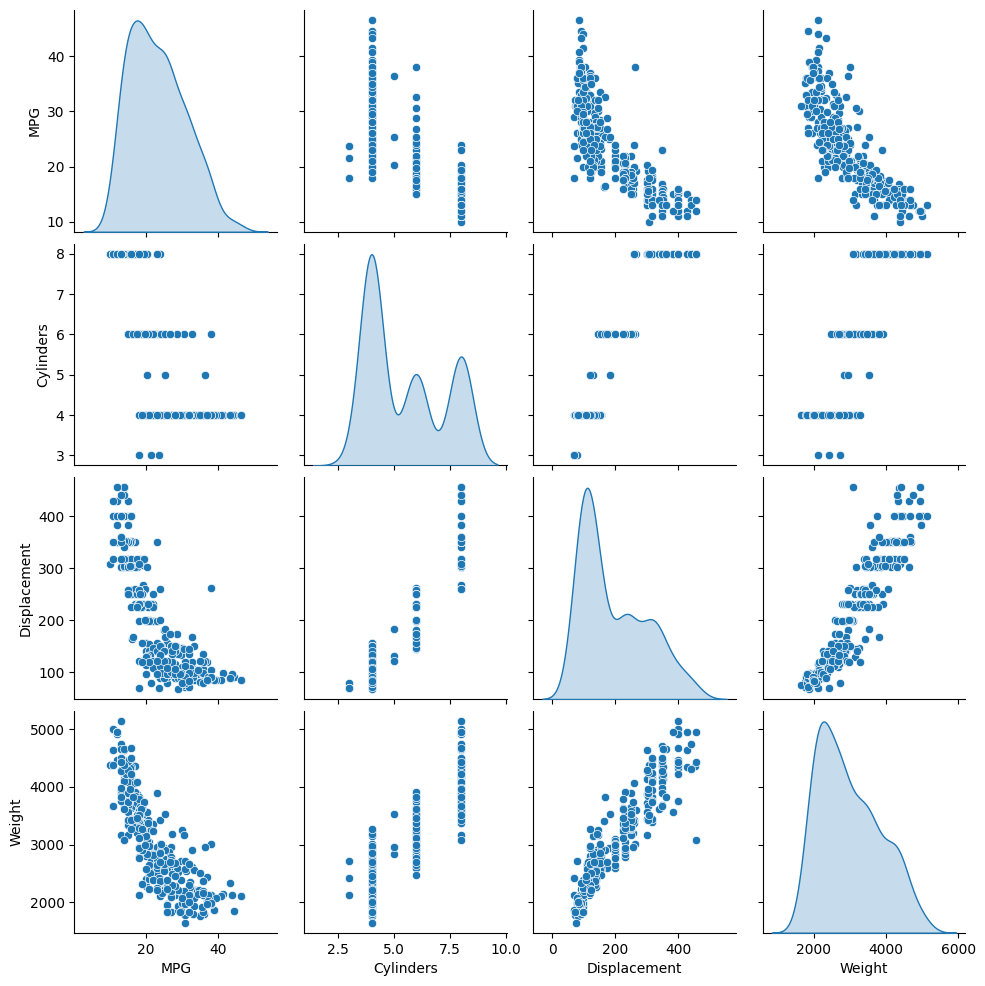

In [ ]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

We split the features from the labels, in this case the MPG values.

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

## Linear Regression with one input.

First we make a simple linear regression to predict mpg based on horsepower.

In [ ]:
X_train_full = np.array(train_features['Horsepower']).reshape((314, 1))
X_test = np.array(test_features['Horsepower']).reshape((78, 1))

Y_train_full = np.array(train_labels).reshape((314, 1))
Y_test = np.array(test_labels).reshape((78, 1))

We import the deepforward base model as well as layers and optimizers.

In [ ]:
from deepforward.model import Model
from deepforward.layers import *
from deepforward.optimizers import *

We now build a simple linear regression model, preprocess the data, and configure the model for regression with a stochastic gradient descent optimizer with a constant learning rate of 0.1.

In [ ]:
model = Model([Input(1),
               Dense(1)],
              )

train_set, valid_set = model.preprocess(X_train_full,
                                        Y_train_full,
                                        scale_X=True,
                                        scale_Y=True)

model.configure(task='regression', optimizer=SGD(0.1))

We then train the model for 10 epochs.

Final training loss: 0.4237      Final validation loss: 0.4730
Final training metric: 0.6510    Final validation metric: 0.6878


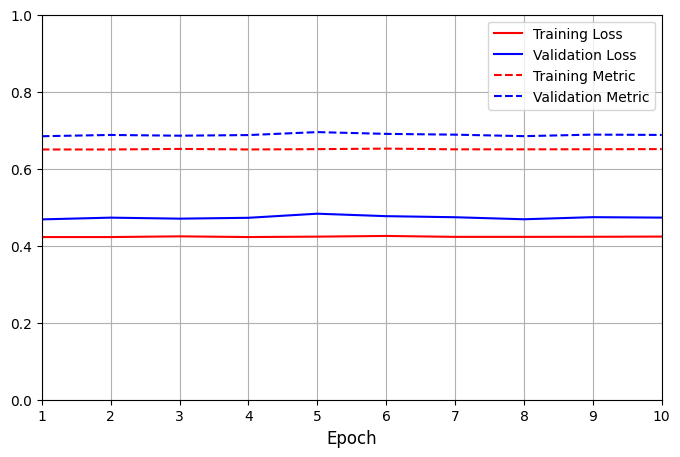

In [ ]:
model.train(train_set, valid_set, epochs=10)

We visualize the model on the test set.

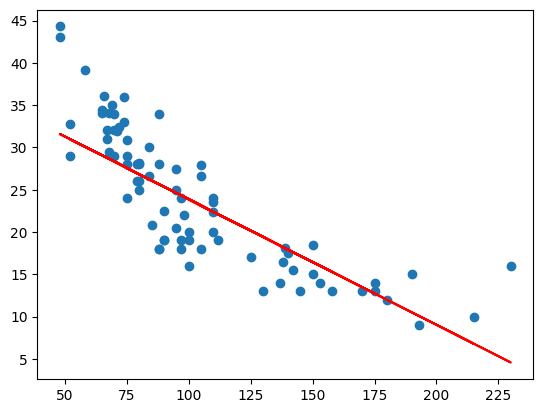

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, model.predict(X_test), color='red')
plt.show()

## Deep neural network with one input.

In [ ]:
model_2 = Model([Input(1),
                 Dense(64, 'relu'),
                 Dense(64, 'relu'),
                 Dense(1)],
                )

train_set, valid_set = model_2.preprocess(X_train_full,
                                          Y_train_full,
                                          scale_X=True,
                                          scale_Y=True)

model_2.configure(task='regression', optimizer=Adam(0.001))

Final training loss: 0.3369      Final validation loss: 0.4020
Final training metric: 0.5804    Final validation metric: 0.6340


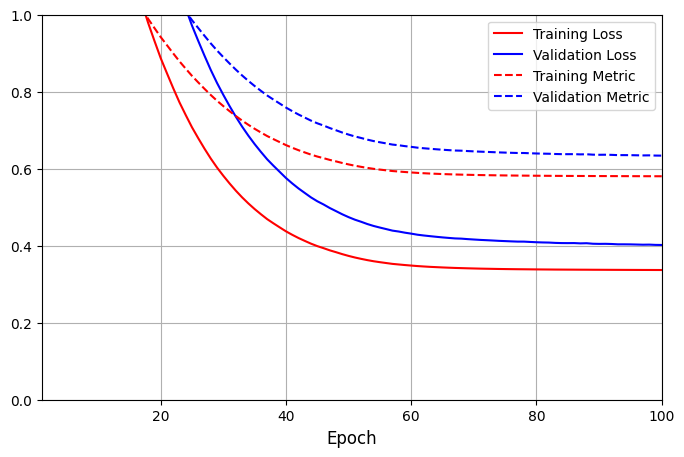

In [ ]:
model_2.train(train_set, valid_set, epochs=100)

The performace on the test set is slightly better now, but there is a higher risk of overfitting.

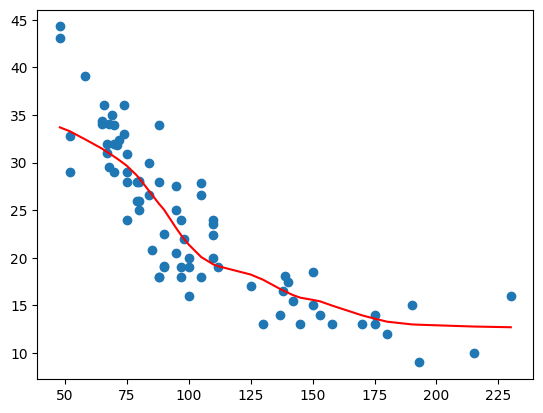

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(np.sort(X_test, 0), model_2.predict(np.sort(X_test, 0)), color='red')
plt.show()

## Multiple Inputs

Let us now train a model on all the features. We will again start with a linear regression.

In [ ]:
X_train_full = np.array(train_features)
X_test = np.array(test_features)

Y_train_full = np.array(train_labels).reshape((314, 1))
Y_test = np.array(test_labels).reshape((78, 1))

In [ ]:
model_3 = Model([Input(9),
               Dense(1)],
              )

train_set, valid_set = model_3.preprocess(X_train_full,
                                        Y_train_full,
                                        scale_X=True,
                                        scale_Y=True)

model_3.configure(task='regression', optimizer=Adam(0.1))

Final training loss: 0.1847      Final validation loss: 0.2323
Final training metric: 0.4298    Final validation metric: 0.4820


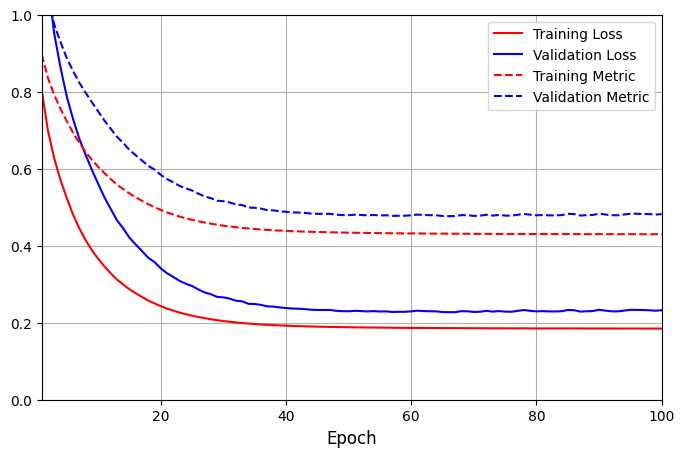

In [ ]:
model_3.train(train_set, valid_set, epochs=100)

In [ ]:
model_3.evaluate(X_test, Y_test)
model_3.evaluate(X_train_full, Y_train_full)

Test loss: 10.1498    Test metric: 3.1859
Test loss: 10.9729    Test metric: 3.3125


Finally, we will try a deep neural network.

In [ ]:
model_4 = Model([Input(9),
               Dense(64, 'relu'),
               Dense(64, 'relu'),
               Dense(1)],
              )

train_set, valid_set = model_4.preprocess(X_train_full,
                                        Y_train_full,
                                        scale_X=True,
                                        scale_Y=True)

model_4.configure(task='regression', optimizer=Adam(0.001))

Final training loss: 0.2208      Final validation loss: 0.1904
Final training metric: 0.4699    Final validation metric: 0.4363


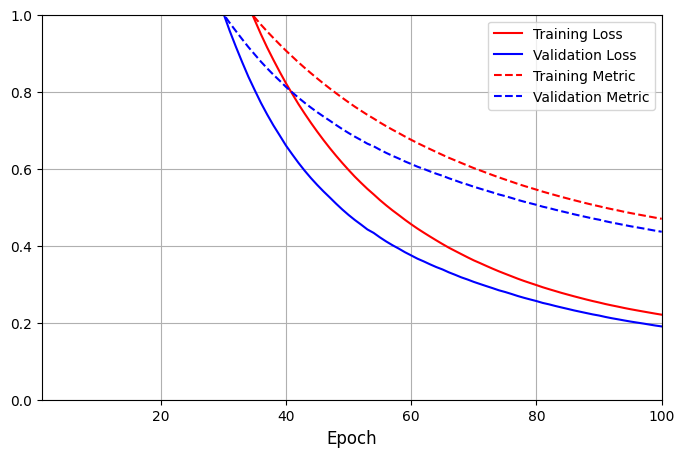

In [ ]:
model_4.train(train_set, valid_set, epochs=100)

In [ ]:
model_4.evaluate(X_test, Y_test)
model_4.evaluate(X_train_full, Y_train_full)

Test loss: 11.3640    Test metric: 3.3711
Test loss: 12.6198    Test metric: 3.5524
